In [10]:
import numpy as np
import matplotlib.pyplot as plt

Zadanie 1

In [25]:
val = np.float32(0.53125)
expected = (val * (10 ** 7))
# 1
array = np.full(10 ** 7, val)

#Trivial
def trivial(array: np.array):
    sum = np.float32(0)
    for i in array:
        sum += i
    return sum

sum = trivial(array)

print(expected,sum)

print(np.abs((sum - expected) / expected))

5312500.0 5030840.5
0.053018257


Błąd względny: $ 2^{-22} $

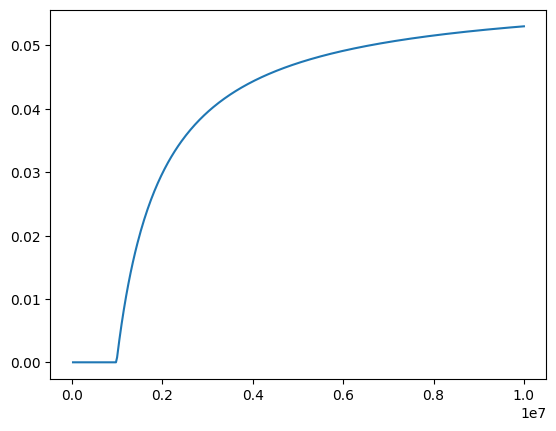

In [11]:
iteration = 0
sum = np.float32(0)

error = []
iteration_table = []

for i in array:
    iteration += 1
    sum += i
    if iteration % 25000 == 0:
        error.append(np.abs(((val * iteration) - sum) / (val * iteration)))
        iteration_table.append(iteration)

plt.plot(iteration_table, error)
plt.show()

In [23]:
# Recursion
def add_req(array: np.array):
    if len(array) == 1:
        return array[0]
    new = np.full(int(np.ceil(len(array)/2)), np.float32(0))
    for i in range(len(new)):
        if 2 * i + 1 < len(array):
            new[i] = array[2 * i] + array[2 * i + 1]
        else:
            new[i] = array[2 * i]
    return add_req(new)

sum_req = add_req(array)

print(expected, sum_req)

print(np.abs((expected - sum_req)/expected))

5312500.0 5312500.0
0.0


In [29]:
import time
start = time.process_time()
sum1 = trivial(array)
end_triv = time.process_time()
sum2 = add_req(array)
end_req = time.process_time()
print(end_triv-start, end_req-end_triv)

0.5 2.875


In [30]:
req_error_input = np.float32(1.00000001)
error_expected = req_error_input * (10 ** 7)
maybe_error_array = np.full(10 **7, req_error_input)
wrong_sum = add_req(maybe_error_array)
print(error_expected, wrong_sum)
print(np.abs((wrong_sum-error_expected)/error_expected))

10000000.0 10000000.0
0.0


Zadanie 2

In [38]:
def khans_agorithm(array: np.array):
    sum = np.float32(0)
    err = np.float32(0)
    for i in array:
        y = np.float32(i - err)
        tmp = np.float32(sum + y)
        err = np.float32((tmp - sum) - y)
        sum = tmp
    return sum

khan_sum = khans_agorithm(array)

print(expected, khan_sum)
print(np.abs((expected-khan_sum)/expected))

start = time.process_time()
sum1 = add_req(array)
end_req = time.process_time()
sum2 = khans_agorithm(array)
end_khan = time.process_time()

print(end_req-start, end_khan-end_req)

5312500.0 5312500.0
0.0
2.078125 7.953125


Zadanie 3

In [ ]:
def riemman_zeta_forward(s, n):
    sum = np.float32(0)
    for k in np.arange(1, n + 1, 1):
        sum = sum + np.divide(1, np.power(k, s))
    return sum

def riemann_zeta_backward(s, n):
    sum = np.float32(0)
    for k in np.arange(n, 0, -1):
        sum = sum + np.divide(1, np.power(k, s))
    return sum

def eta_dirlichet_forward(s, n):
    sum = np.float32(0)
    for k in np.arange(1, n + 1, 1):
        sum = sum + np.power(-1, k)*np.divide(1, np.power(k, s))
    return sum

def eta_dirlichet_backward(s, n):
    sum = np.float32(0)
    for k in np.arange(n, 0, -1):
        sum = sum + np.power(-1, k)*np.divide(1, np.power(k, s))
    return sum